<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/Preparaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de los datos

Es una de las primeras etapas en el proceso de analítica de negocios. En esta estapa:

- Se revisa la calidad de la información
- Se gestionan los datos nulos
- Se escalan las variables
- Se transforman los datos
- Se mide la importancia de las características.

In [ ]:
# Primero, importamos los datos de estudio

# Cargamos las librerías necesarias
import pandas as pd #gestión de tablas
import numpy as np #manejo numérico
import matplotlib.pyplot as plt #visualización
import seaborn as sns #visualización avanzada

In [ ]:
# Configuración de estilos de las visualizaciones
sns.set_theme(style = "whitegrid", palette = "pastel")

In [ ]:
# Cargamos los datos
datos_propina = pd.read_csv("http://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Visualizamos los primeros registros para efectos de comprobación
datos_propina.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [ ]:
# Revisamos a más detalle las características de los datos
datos_propina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Limpieza y transformación de los datos

In [ ]:
# 1. Identificar los valores nulos
datos_propina.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# 2. Eliminamos datos duplicados
datos_propina.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 3. Convertir tipos de datos
datos_propina['sex'] = datos_propina['sex'].astype('category')
datos_propina['smoker'] = datos_propina['smoker'].astype('category')

In [ ]:
# 4. Escalamiento de datos numéricos

datos_propina['total_bill'] = (datos_propina['total_bill'] -
                               datos_propina['total_bill'].min()) / \
 (datos_propina['total_bill'].max() - datos_propina['total_bill'].min())

In [ ]:
# Transformación a datos numéricos

# Cargamos la librería con las funciones necesarias
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Codificamos las características categóricas
datos_propina['sex_enc'] = le.fit_transform(datos_propina['sex'])
datos_propina['smoker_enc'] = le.fit_transform(datos_propina['smoker'])
datos_propina['day_enc'] = le.fit_transform(datos_propina['day'])
datos_propina['time_enc'] = le.fit_transform(datos_propina['time'])

# Creamos una tabla con las nuevas características
X = datos_propina[['total_bill', 'sex_enc', 'smoker_enc', 'day_enc', 'time_enc']]

# Creamos el vector de la variable objetivo
y = datos_propina['tip']

## Selección de características

En este caso utilizaremos dos técnicas (aunque existen muchas más):

- Correlación entre variables
- A través de un algoritmo de *Machine Learning*

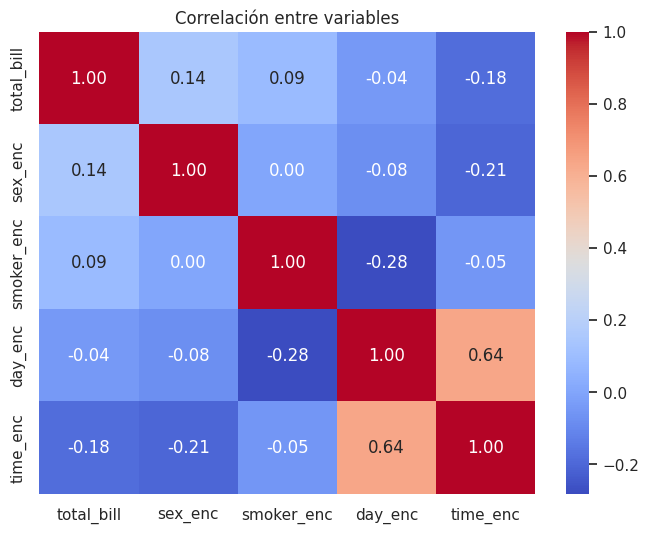

In [ ]:
# 5. Analizamos la correlación entre variables

# Configuramos el tamaño de la figura
plt.figure(figsize = (8,6))

# Graficamos un mapa de calor de la correlación de las variables
# Primero ponemos los datos a graficar, en este caso la correlación de las
# variables de la tabla datos_propina. El segundo parámetro es de la configuración
# de las anotaciones, en este caso las aceptamos. El tercer parámetro es el
# mapa de color, para nosotros será coolwarm. El último parámetro es el formato
# de los número decimales, en nuestro caso será con dos cifras decimales
sns.heatmap(X.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
# Agregamos el título
plt.title("Correlación entre variables")
plt.show()

In [ ]:
# 6. Medimos la importancia de las características con un
# modelo de aprendizaje

# Importamos las librerías adicionales para esta función
from sklearn.ensemble import RandomForestRegressor

# Instanciamos el modelo de aprendizaje
modelo = RandomForestRegressor()

# Entrenamos el modelo de aprendizaje. Dentro de los parámetros
# debemos ingresar la X como matriz de características predictoras
# y la "y" como vector de variable objetivo.
modelo.fit(X, y)

RandomForestRegressor()

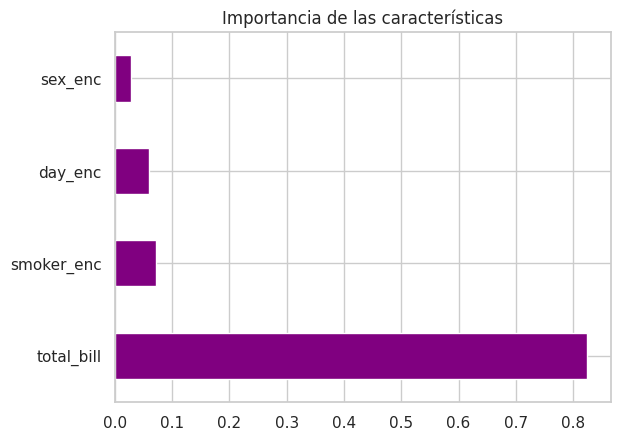

In [ ]:
# Visualizamos la importancia de las características

# Primero creamos una serie con la información de importancia
importancia = pd.Series(modelo.feature_importances_,
                        index = X.columns)

# Seleccionamos las 4 características más importantes
# y las ordenamos de mayor a menor
importancia.nlargest(4).plot(kind = "barh", color = 'purple')
# Agregamos el título
plt.title("Importancia de las características")
plt.show()

## Exploración visual de datos

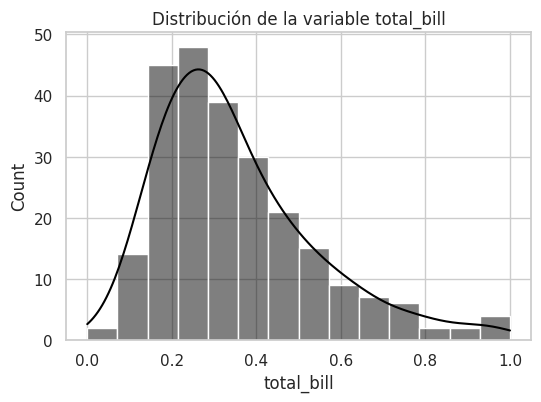

In [ ]:
# 7. Revisamos la distribución de las variables numéricas

# Configuramos el tamaño de la figura
plt.figure(figsize = (6,4))

# Graficamos un histograma de la variable total_bill
# sns es porque es un gráfico de la librería seaborn
# kde habilita la silueta de la pdf
sns.histplot(datos_propina['total_bill'], kde = True, color = 'black')
# Agregamos el título
plt.title("Distribución de la variable total_bill")
plt.show()

<ipython-input-22-69101507ed64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'day', y = 'tip', data = datos_propina, palette = 'pastel');


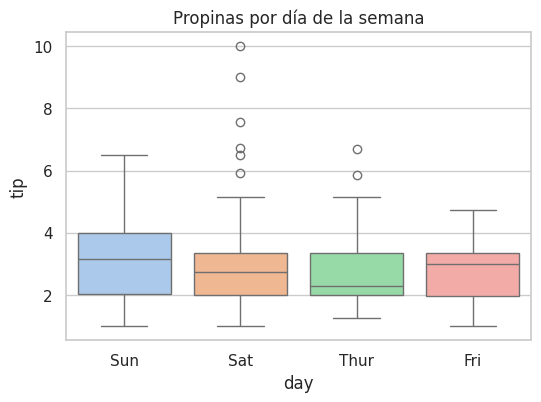

In [ ]:
# 8. Graficamos un boxplot para las propinas por día de la semana

# Configuramos el tamaño de la figura
plt.figure(figsize = (6,4))

# Graficamos un boxplot de la variable tip
# sns es porque es un gráfico de la librería seaborn
sns.boxplot(x = 'day', y = 'tip', data = datos_propina, palette = 'pastel');
# Agregamos el título
plt.title("Propinas por día de la semana")
plt.show()

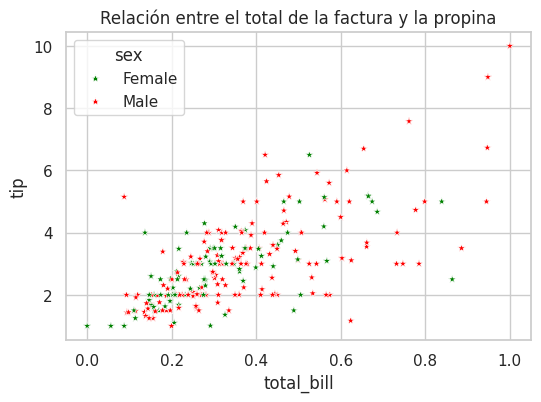

In [ ]:
# 9. Podemos revisar la relación entre el total
# de la factura y la propina pero con un diagrama de dispersión

# Configuramos tamaño
plt.figure(figsize = (6,4))

# Graficamos un diagrama de dispersión
sns.scatterplot(x = 'total_bill', y = 'tip', data = datos_propina,
                hue = 'sex', palette = ['green', 'red'], marker = '*')

# Configuramos el título
plt.title("Relación entre el total de la factura y la propina")
plt.show()